<a href="https://colab.research.google.com/github/dokim94/Deep-learning-study/blob/main/Tensorflow%EB%A1%9C_%EA%B0%84%EB%8B%A8%ED%95%9C_linear_regression_%EA%B5%AC%ED%98%84%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##Tensorflow로 간단한 linear regression 구현하기

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__) #tensorflow 버전 확인하기

2.7.0


In [ ]:
#1. Build graph using TF operation
tf.random.set_seed(1)  #seed 고정

x_train = [1., 2., 3.]
y_train = [1., 2., 3.]

W = tf.Variable(tf.random.normal([1], name='weight', dtype=tf.float32))
b = tf.Variable(tf.random.normal([1], name='bias', dtype=tf.float32))

W.numpy(), b.numpy()

(array([-1.1012203], dtype=float32), array([0.40308788], dtype=float32))

(-8.0, 8.0)

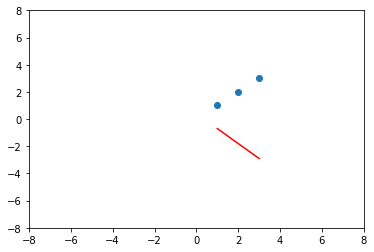

In [ ]:
hypothesis = W*x_train +b

plt.plot(x_train, y_train, 'o')
plt.plot(x_train, hypothesis, 'r-')
plt.xlim(-8, 8)
plt.ylim(-8, 8)

In [ ]:
@tf.function  ##graph 만들기
def cost_func(W, x_train, y_train, b):
  hypothesis = W * x_train + b
  return tf.reduce_mean(tf.square(hypothesis - y_train))

In [ ]:
for step in range(2001):
  optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
  learning_rate = 0.01
  with tf.GradientTape() as tape:
    loss = cost_func(W, x_train, y_train, b)
    
  W_grad, b_grad = tape.gradient(loss, [W, b])
  W.assign_sub(learning_rate * W_grad)
  b.assign_sub(learning_rate * b_grad)
  if step % 100 == 0:
    print(step, W.numpy(), b.numpy(), loss)
  

0 [-0.9212299] [0.47907493] tf.Tensor(17.378496, shape=(), dtype=float32)
100 [0.61631346] [0.87217915] tf.Tensor(0.10965445, shape=(), dtype=float32)
200 [0.6983963] [0.6856161] tf.Tensor(0.06775976, shape=(), dtype=float32)
300 [0.7629121] [0.5389566] tf.Tensor(0.0418714, shape=(), dtype=float32)
400 [0.81362724] [0.4236691] tf.Tensor(0.025873994, shape=(), dtype=float32)
500 [0.85349405] [0.33304244] tf.Tensor(0.015988557, shape=(), dtype=float32)
600 [0.884833] [0.2618017] tf.Tensor(0.009879944, shape=(), dtype=float32)
700 [0.90946823] [0.2058] tf.Tensor(0.0061052083, shape=(), dtype=float32)
800 [0.9288337] [0.16177757] tf.Tensor(0.0037726534, shape=(), dtype=float32)
900 [0.9440569] [0.12717192] tf.Tensor(0.0023312669, shape=(), dtype=float32)
1000 [0.9560236] [0.09996869] tf.Tensor(0.0014405823, shape=(), dtype=float32)
1100 [0.96543056] [0.07858453] tf.Tensor(0.0008901937, shape=(), dtype=float32)
1200 [0.9728253] [0.06177463] tf.Tensor(0.0005500847, shape=(), dtype=float32)
1

(0.0, 4.0)

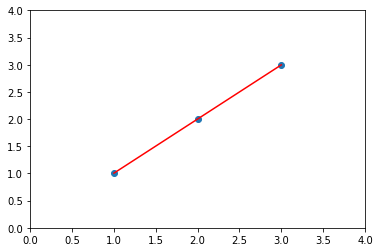

In [ ]:
hypothesis = W * x_train + b
plt.plot(x_train, y_train, 'o')
plt.plot(x_train, hypothesis, 'r-')
plt.ylim(0, 4)
plt.xlim(0,4)